# Python for Trading

This document explains how to optimize your portfolio and get another suggestions based on different theories and equations, and other **interesting** things.<br>


# <center>Portfolio Optimization</center>

Resources:
- [An Introduction to Portfolio Optimization in Python](https://builtin.com/data-science/portfolio-optimization-python)
- [Portfolio Optimization with Python using Efficient Frontier](https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/#4-modern-portfolio-theory-mpt-)
- [Portfolio Optimization Using mpt in Python](https://www.analyticsvidhya.com/blog/2021/04/portfolio-optimization-using-mpt-in-python/)

1. <font color='red'>What is portfolio optimization?</font>
Portfolio optimization is the process of creating a portfolio of assets, for which your investment has the maximum return and minimum risk.
2. <font color='red'>What does a portfolio mean?</font>
An investor’s portfolio basically is his/her investment in different kinds of assets from different companies.
3. <font color='red'>What are assets, returns and risk?</font>
Assets are of various kinds. An asset is what you would purchase if you want to invest in a company.<br>
This profit is what we call **returns**.<br>
But what if the company whose stocks you have purchased goes bankrupt?<br>
This will lead to its stocks crashing in the share market and instead of gaining profits, you will also lose your capital investment.<br>
This is what is called **risk** of investment.
4. <font color='orange'>**Modern Portfolio Theory (MPT)**</font>
Modern Portfolio Theory, or also known as mean-variance analysis is a mathematical process which allows the user to maximize returns for a given risk level.
5. <font color='red'>What is Efficient Frontier?</font>
Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return.<br>
Portfolios that lie outside the efficient frontier are sub-optimal because they do not provide either enough return for the level of risk or have a higher risk for the defined rate of return.

In each of these cases, the task of optimizing assets involves balancing the trade-offs between risk and return, where return on a stock is the profits realized after a period of time and risk is the standard deviation in an asset's value.

<font color='orange'>*The idea here is that having a portfolio of different types of assets is less risky than having ones that are similar.*</orange>

In [1]:
%pip install yfinance
%pip install mplfinance
%pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
# from yahoofinancials import YahooFinancials
import mplfinance as mpf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn  as sns
from plotly import express as px
import datetime as dt
import os
# -----------------------------------------
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
#-------------------------------------------
sns.set()

# *Downloading Data from* <font color='purple'>Yahoo!</font>
1- Using `yf.download` <br>
2- Using `yfinance.Ticker(['list of stock names']).history('args')`<br>
3- Using `pandas_data_reader`<br>

[List of SP500 Companies](https://www.liberatedstocktrader.com/sp-500-companies/)

*Define stock names, Start date, End date, and interval*

In [3]:
stocknames = ['MSFT','AAPL', 'GOOGL','HD', 'SBUX', 'TSLA', 'CVX', 'ABBV', 'KO'] # You can change them as you wish
# stocknames = [
#     "AXP",
#     "AMGN",
#     "AAPL",
#     "BA",
#     "CAT",
#     "CSCO",
#     "CVX",
#     "GS",
#     "HD",
#     "HON",
#     "IBM",
#     "INTC",
#     "JNJ",
#     "KO",
#     "JPM",
#     "MCD",
#     "MMM",
#     "MRK",
#     "MSFT",
#     "NKE",
#     "PG",
#     "TRV",
#     "UNH",
#     "CRM",
#     "VZ",
#     "V",
#     "WBA",
#     "WMT",
#     "DIS",
#     "DOW",
# ]
startdate = '2010-01-01' # '2020-01-01' #
# enddate =   dt.datetime.now().date()
enddate = '2021-10-01'
interval = '1d'

downloading data using Using yf.download

In [4]:
yf.pdr_override()
for stock in stocknames:
    from pandas_datareader import data
    # df= data.DataReader(stock, 'yahoo', startdate, enddate)
    df = yf.download(stock, start=startdate, end=enddate)
    df.to_csv('{}.csv'.format(stock))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
# Functions
def appending(cols=[], startdate = '', enddate = ''):
    '''append stocks data into one file and then select the Adj Close column'''
    global df
    dates = pd.date_range(start= startdate, end= enddate)
    df = pd.DataFrame(index= dates)
    for stock in stocknames:
        df_symbols = pd.read_csv(os.path.join('{}.csv'.format(stock)), index_col='Date', parse_dates=True, usecols=cols, na_values=['NaN'])
        df_symbols = df_symbols.rename(columns={'Adj Close' : stock})
        df = df.join(df_symbols)
        df = df.loc[dates]
    df = df.dropna()
    return df

def appending2(cols=[], startdate = '', enddate = ''):
    '''append stocks data into one file and then select the Adj Close column'''
    global df_
    dates = pd.date_range(start= startdate, end= enddate)
    df_ = pd.DataFrame(index= dates)
    for stock in stocknames:
        df_symbols = pd.read_csv(os.path.join('{}_test.csv'.format(stock)), index_col='Date', parse_dates=True, usecols=cols, na_values=['NaN'])
        df_symbols = df_symbols.rename(columns={'Adj Close' : stock})
        df_ = df_.join(df_symbols)
        df_ = df_.loc[dates]
        
    df_ = df_.dropna()
    return df_

In [6]:
appending(['Date', 'Adj Close'], startdate, enddate)
df.index.names = ['Date']
df.head()

,MSFT,AAPL,GOOGL,HD,SBUX,TSLA,CVX,ABBV,KO
Date,,,,,,,,,
2013-01-02,22.57,16.77,18.10,49.71,22.59,2.36,70.24,22.42,26.82
2013-01-03,22.27,16.56,18.11,49.57,22.74,2.32,69.94,22.23,26.82
2013-01-04,21.86,16.10,18.47,49.47,22.87,2.29,70.31,21.95,26.86
2013-01-07,21.81,16.00,18.39,49.21,22.88,2.29,69.83,22.00,26.61
2013-01-08,21.70,16.04,18.35,49.51,22.84,2.25,69.52,21.52,26.42


In [7]:
# Testing allocations
# Import data on stocks from test_start_date to test_end_date
test_start_date = '2021-10-01'
test_end_date = '2023-03-01'
yf.pdr_override()
for stock in stocknames:
    from pandas_datareader import data
    # df= data.DataReader(stock, 'yahoo', startdate, enddate)
    df__ = yf.download(stock, start=test_start_date, end=test_end_date)
    df__.to_csv('{}_test.csv'.format(stock))
print(df__.head())
# Append the test data to the original dataframe
df_ = appending2(['Date', 'Adj Close'], test_start_date, test_end_date)
df_.index.names = ['Date']
df_.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
            Open  High   Low  Close  Adj Close    Volume
Date                                                    
2021-10-01 52.78 53.20 52.57  53.02      49.93  16277400
2021-10-04 53.06 53.53 52.40  52.99      49.90  18973400
2021-10-05 53.02 53.47 52.93  53.08      49.99  17173100
2021-10-06 52.77 53.77 52.51  53.71      50.58  21284500
2021-10-07 53.99 54.28 53.81  53.88  

,MSFT,AAPL,GOOGL,HD,SBUX,TSLA,CVX,ABBV,KO
Date,,,,,,,,,
2021-10-01,283.38,140.83,136.54,313.86,107.57,258.41,95.79,99.71,49.93
2021-10-04,277.51,137.37,133.66,310.63,106.18,260.51,96.15,99.38,49.90
2021-10-05,283.05,139.31,136.02,313.50,105.60,260.20,97.19,100.10,49.99
2021-10-06,287.31,140.19,137.57,314.33,106.35,260.92,96.34,99.92,50.58
2021-10-07,289.02,141.46,139.23,321.11,106.89,264.54,97.03,101.34,50.74


In [8]:
# Get the Dow Jones Industrial Average (DJIA) data
dji = yf.download('^DJI', start=test_start_date, end=test_end_date)
dji.to_csv('DJI.csv')
print(dji.head())
# Calculate final return of DJIA
dji_final = dji['Adj Close'][-1] / dji['Adj Close'][0] - 1
dji_final


[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2021-10-01 33,930.70 34,490.56 33,785.54 34,326.46  34,326.46  427580000
2021-10-04 34,312.96 34,410.28 33,821.58 34,002.92  34,002.92  396860000
2021-10-05 34,035.25 34,490.95 34,035.25 34,314.67  34,314.67  311520000
2021-10-06 34,198.96 34,432.68 33,854.69 34,416.99  34,416.99  322170000
2021-10-07 34,509.72 34,975.19 34,509.72 34,754.94  34,754.94  273290000


/var/folders/74/7098k_jd3bz6dklwx9078h6r0000gn/T/ipykernel_35468/3674734653.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dji_final = dji['Adj Close'][-1] / dji['Adj Close'][0] - 1


-0.04864357330020774

In [9]:
df.head()

,MSFT,AAPL,GOOGL,HD,SBUX,TSLA,CVX,ABBV,KO
Date,,,,,,,,,
2013-01-02,22.57,16.77,18.10,49.71,22.59,2.36,70.24,22.42,26.82
2013-01-03,22.27,16.56,18.11,49.57,22.74,2.32,69.94,22.23,26.82
2013-01-04,21.86,16.10,18.47,49.47,22.87,2.29,70.31,21.95,26.86
2013-01-07,21.81,16.00,18.39,49.21,22.88,2.29,69.83,22.00,26.61
2013-01-08,21.70,16.04,18.35,49.51,22.84,2.25,69.52,21.52,26.42


### Hierarchical Risk Parity (HRP)<br>
The HRP method works by finding subclusters of similar assets based on returns and constructing a hierarchy from these clusters to generate weights for each asset. <br>
HRP does not require inverting of a covariance matrix, which is a measure of how stock returns move in the same direction.<br>
HRP is not as sensitive to outliers.

In [10]:
from preprocessors import FeatureEngineer
# from yahoodownloader import YahooDownloader

# DOW_30_TICKER = [
#     "AXP",
#     "AMGN",
#     "AAPL",
#     "BA",
#     "CAT",
#     "CSCO",
#     "CVX",
#     "GS",
#     "HD",
#     "HON",
#     "IBM",
#     "INTC",
#     "JNJ",
#     "KO",
#     "JPM",
#     "MCD",
#     "MMM",
#     "MRK",
#     "MSFT",
#     "NKE",
#     "PG",
#     "TRV",
#     "UNH",
#     "CRM",
#     "VZ",
#     "V",
#     "WBA",
#     "WMT",
#     "DIS",
#     "DOW",
# ]

# start_date_train = "2020-01-01"
# end_date_train = "2023-01-01"
# start_date_test = "2023-01-01"
# end_date_test = "2023-04-01"

# df_train = YahooDownloader(start_date=start_date_train,
#                      end_date = end_date_train,
#                      ticker_list = DOW_30_TICKER).fetch_data()
# df_test = YahooDownloader(start_date=start_date_test,
#                         end_date = end_date_test,
#                         ticker_list = DOW_30_TICKER).fetch_data()



# INDICATORS = ['macd',
#             'rsi_30',
#             'cci_30',
#             'dx_30',
#             'close_30_sma',
#             'close_60_sma',
#             'close_30_ema',
#             'close_60_ema',
#             'close_180_ema',
#             'boll',
#             'boll_ub',
#             'boll_lb']

# def add_indicators(df):
#     fe = FeatureEngineer(use_technical_indicator=True,
#                      tech_indicator_list = INDICATORS,
#                      use_turbulence=False,
#                      user_defined_feature = False)
#     processed = fe.preprocess_data(df)
#     processed = processed.copy()
#     processed = processed.fillna(0)
#     processed = processed.replace(np.inf,0)
#     return processed

# df_train = add_indicators(df_train)
# df_test = add_indicators(df_test)


In [11]:
# print(df_train.head())

# df = pd.DataFrame()

# # df['Date'] = df_train['date']
# for i in range(len(DOW_30_TICKER)):
#     df[DOW_30_TICKER[i]] = df_train[df_train['tic']==DOW_30_TICKER[i]]['close'].values
#     df['date'] = df_train[df_train['tic']==DOW_30_TICKER[i]]['date'].values

# df = df.set_index('date')

# df.index = pd.to_datetime(df.index)

df.head()

,MSFT,AAPL,GOOGL,HD,SBUX,TSLA,CVX,ABBV,KO
Date,,,,,,,,,
2013-01-02,22.57,16.77,18.10,49.71,22.59,2.36,70.24,22.42,26.82
2013-01-03,22.27,16.56,18.11,49.57,22.74,2.32,69.94,22.23,26.82
2013-01-04,21.86,16.10,18.47,49.47,22.87,2.29,70.31,21.95,26.86
2013-01-07,21.81,16.00,18.39,49.21,22.88,2.29,69.83,22.00,26.61
2013-01-08,21.70,16.04,18.35,49.51,22.84,2.25,69.52,21.52,26.42


In [12]:
daily_returns = df.pct_change().dropna()

In [13]:
%pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 800.6 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.4/228.4 kB 5.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 13.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.5 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl.metadata (9.5 kB)
  Using cached qdldl-0.1.7.post0-cp311-cp311-macosx_14_0_arm64.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.2 MB/s eta 0:00:0

In [14]:
from pypfopt import HRPOpt
# run the optimization algorithm to get the weights:
hrp = HRPOpt(daily_returns)
hrp_weights = hrp.optimize()

# performance of the portfolio and the weights:
hrp.portfolio_performance(verbose=True)
hrp_weights = dict(hrp_weights)
print(hrp_weights)

Expected annual return: 20.1%
Annual volatility: 17.2%
Sharpe Ratio: 1.05
{'AAPL': 0.08083400546908384, 'ABBV': 0.13970966610934138, 'CVX': 0.10950004948417703, 'GOOGL': 0.10418365341586477, 'HD': 0.08450789683680963, 'KO': 0.27756551430215487, 'MSFT': 0.09581203862994297, 'SBUX': 0.07307407393783773, 'TSLA': 0.03481310181478785}


/Users/omgodage/Desktop/College/sem 5/CS337/CS-337-project-main/venv/lib/python3.11/site-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.56158833 0.56158833 0.56158833 0.56158833]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


In [15]:
sum(hrp_weights.values())

1.0000000000000002

Finally, let’s calculate the discrete allocation using our weights:

In [16]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
da_hrp = DiscreteAllocation(hrp_weights, latest_prices, total_portfolio_value=10000)

allocation, leftover = da_hrp.greedy_portfolio()
print("Discrete allocation (HRP):", allocation)
print("Funds remaining (HRP): ${:.2f}".format(leftover))

Discrete allocation (HRP): {'KO': 56, 'ABBV': 14, 'CVX': 11, 'GOOGL': 7, 'MSFT': 4, 'HD': 3, 'AAPL': 6, 'SBUX': 7, 'TSLA': 1}
Funds remaining (HRP): $17.51


/var/folders/74/7098k_jd3bz6dklwx9078h6r0000gn/T/ipykernel_35468/2578648402.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = dji['Adj Close'][0] / portfolio_progression[0]


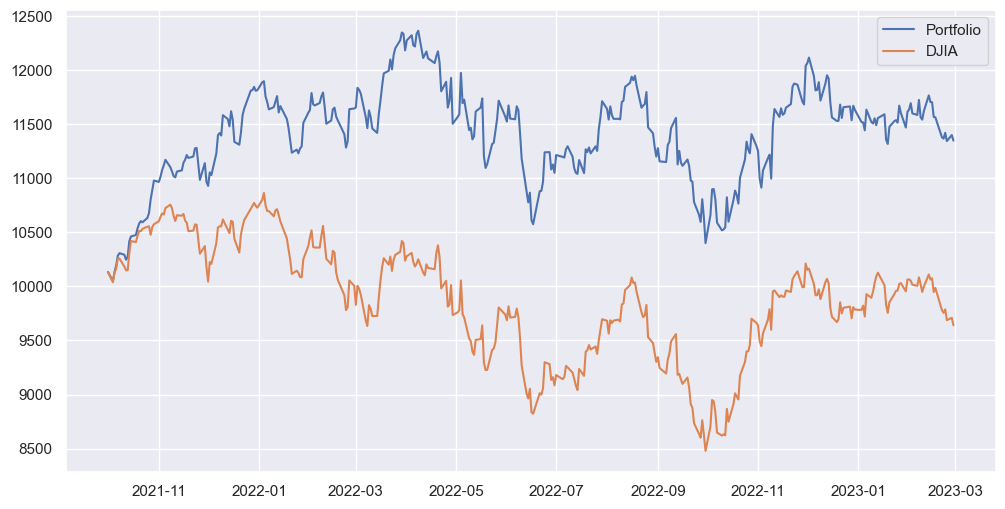

Sharpe Ratio:  0.03395393262195125
Initial Valuation:  10133.113059997559
End Valuation:  11346.842819213867
Return:  0.11977856676718072
DJI Return:  -0.04864357330020774


In [17]:
# Test
# Buying Valuation
# Multiply the contents of allocation with the first row of df_
init_valuation = 0
for key in allocation:
    init_valuation += allocation[key] * df_.iloc[0][key]

end_valuation = 0
for key in allocation:
    end_valuation += allocation[key] * df_.iloc[-1][key]

# Add a portfolio progression column to df_
portfolio_progression = []
for i in range(len(df_)):
    portfolio_progression.append(0)
    for key in allocation:
        portfolio_progression[i] += allocation[key] * df_.iloc[i][key]

df_['Portfolio Progression'] = portfolio_progression

daily_returns = df_.pct_change().dropna()

factor = dji['Adj Close'][0] / portfolio_progression[0]

dji['Adj Close'] = dji['Adj Close'] / factor

df_['Portfolio Progression'] = portfolio_progression
plt.figure(figsize=(12, 6))
plt.plot(df_['Portfolio Progression'])
plt.plot(dji['Adj Close'])
plt.legend(['Portfolio', 'DJIA'])
plt.show()

end_valuation = portfolio_progression[-1]
init_valuation = portfolio_progression[0]

print("Sharpe Ratio: ", daily_returns['Portfolio Progression'].mean() / daily_returns['Portfolio Progression'].std())
print('Initial Valuation: ', init_valuation)
print('End Valuation: ', end_valuation)
print('Return: ', (end_valuation - init_valuation)/init_valuation)
print('DJI Return: ', dji_final)



### Mean Conditional Value at Risk (mCVAR)
The mCVAR is another popular alternative to mean variance optimization. It works by measuring the worst-case scenarios for each asset in the portfolio, which is represented here by losing the most money. The worst-case loss for each asset is then used to calculate weights to be used for allocation for each asset. <br>

Calculate the weights and get the performance:

In [18]:
from pypfopt.efficient_frontier import EfficientCVaR
from pypfopt.expected_returns import mean_historical_return

mu= mean_historical_return(df)
S = df.cov()
ef_cvar = EfficientCVaR(mu, S)
cvar_weights = ef_cvar.min_cvar()

cleaned_weights = ef_cvar.clean_weights()
print(dict(cleaned_weights))
round(np.mean(ef_cvar.expected_returns) *100,2)

{'MSFT': 0.0, 'AAPL': 0.0, 'GOOGL': 0.0, 'HD': 1.0, 'SBUX': 0.0, 'TSLA': 0.0, 'CVX': 0.0, 'ABBV': 0.0, 'KO': 0.0}


/Users/omgodage/Desktop/College/sem 5/CS337/CS-337-project-main/venv/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


25.47

Next, get the discrete allocation:

In [19]:
np.seterr(invalid= 'ignore')
da_cvar = DiscreteAllocation(cvar_weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da_cvar.greedy_portfolio()
print("Discrete allocation (CVAR):", allocation)
print("Funds remaining (CVAR): ${:.2f}".format(leftover))

Discrete allocation (CVAR): {'HD': 32}
Funds remaining (CVAR): $5.27


/Users/omgodage/Desktop/College/sem 5/CS337/CS-337-project-main/venv/lib/python3.11/site-packages/pypfopt/discrete_allocation.py:212: RuntimeWarning: divide by zero encountered in divide
  current_weights /= current_weights.sum()


/var/folders/74/7098k_jd3bz6dklwx9078h6r0000gn/T/ipykernel_35468/1749566990.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = dji['Adj Close'][0] / portfolio_progression[0]


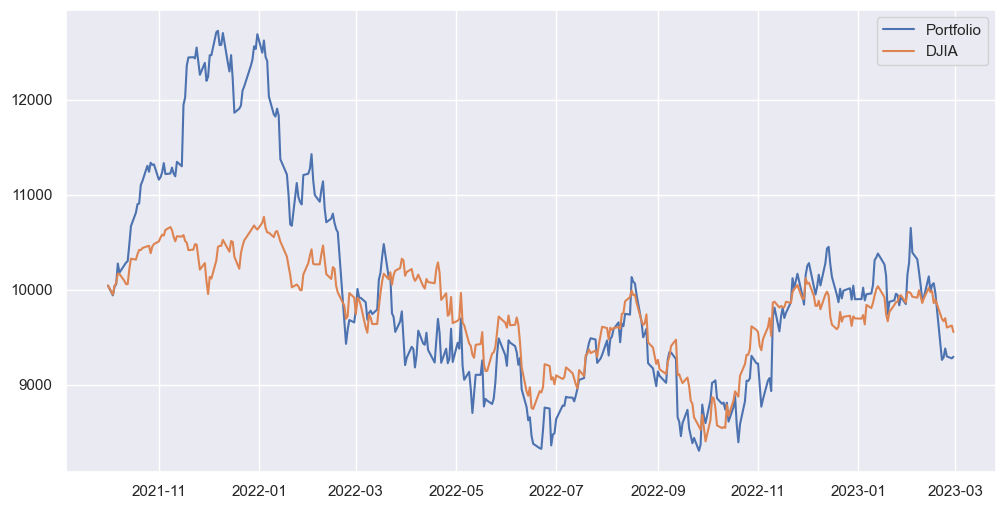

Sharpe Ratio:  0.03395393262195125
Initial Valuation:  10043.4423828125
End Valuation:  9294.3662109375
Return:  -0.07458360822151036
DJI Return:  -0.04864357330020774


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [20]:
# Again, find the portfolio progression
portfolio_progression = []
for i in range(len(df_)):
    portfolio_progression.append(0)
    for key in allocation:
        portfolio_progression[i] += allocation[key] * df_.iloc[i][key]

factor = dji['Adj Close'][0] / portfolio_progression[0]

dji['Adj Close'] = dji['Adj Close'] / factor

df_['Portfolio Progression'] = portfolio_progression
plt.figure(figsize=(12, 6))
plt.plot(df_['Portfolio Progression'])
plt.plot(dji['Adj Close'])
plt.legend(['Portfolio', 'DJIA'])
plt.show()

end_valuation = portfolio_progression[-1]
init_valuation = portfolio_progression[0]

print("Sharpe Ratio: ", daily_returns['Portfolio Progression'].mean() / daily_returns['Portfolio Progression'].std())
print('Initial Valuation: ', init_valuation)
print('End Valuation: ', end_valuation)
print('Return: ', (end_valuation - init_valuation)/init_valuation)
print('DJI Return: ', dji_final)
print


In [ ]:
from plot import backtest_stats, get_baseline
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "buy_cost_pct": 0.001, 
    "sell_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4,
    "print_verbosity":5
}
rebalance_window = 63 
validation_window = 63

unique_trade_date = df_.loc[validation_window:,"Date"].unique()
df_trade_date = pd.DataFrame(unique_trade_date,columns=["Date"])

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))
    df_account_value = pd.concat([df_account_value,temp],ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

df_dji_ = get_baseline(
        ticker="^DJI", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

df_dji = pd.DataFrame()
df_dji['date'] = df_account_value['date']
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
df_dji = df_dji.set_index(df_dji.columns[0])

df_result_ensemble = pd.DataFrame({'date': df_account_value['date'], 'ensemble': df_account_value['account_value']})
df_result_ensemble = df_result_ensemble.set_index('date')
result = pd.DataFrame()

result = pd.merge(df_result_ensemble, df_dji, left_index=True, right_index=True)
result.columns = ['ensemble', 'dji']

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();

----------------------------------

*Portfolio expected returns*<br>
The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

Note that we use the resample() function to get yearly returns. The argument to function, ‘Y’, denotes yearly.

In [21]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last()
print (ind_er)
ind_er= ind_er.pct_change().mean()

ind_er.to_frame()

             MSFT   AAPL  GOOGL     HD   SBUX   TSLA    CVX  ABBV    KO
Date                                                                   
2013-12-31  31.50  17.57  28.05  65.82  32.62  10.03  82.09 35.06 30.31
2014-12-31  40.18  24.70  26.53  85.72  34.66  14.83  76.36 44.85 31.91
2015-12-31  49.30  23.96  38.90 110.17  51.37  16.00  64.01 41.93 33.55
2016-12-31  56.74  26.95  39.62 114.07  48.22  14.25  87.48 46.04 33.43
2017-12-31  79.85  40.01  52.67 164.96  50.80  20.76  96.74 73.69 38.24
2018-12-31  96.45  37.85  52.25 152.93  58.29  22.19  87.31 72.99 40.83
2019-12-31 151.97  71.52  66.97 199.66  81.07  27.89 100.65 74.06 49.24
2020-12-31 216.60 130.39  87.63 248.59 100.68 235.22  74.53 94.59 50.46
2021-12-31 276.34 139.70 133.68 312.34 105.08 258.49  93.14 98.60 49.41


,0
MSFT,0.32
AAPL,0.34
GOOGL,0.23
HD,0.23
SBUX,0.17
TSLA,1.10
CVX,0.04
ABBV,0.15
KO,0.07


In [22]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
ann_sd

MSFT    0.26
AAPL    0.28
GOOGL   0.25
HD      0.23
SBUX    0.24
TSLA    0.55
CVX     0.29
ABBV    0.28
KO      0.18
dtype: float64

In [23]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
MSFT,0.32,0.26
AAPL,0.34,0.28
GOOGL,0.23,0.25
HD,0.23,0.23
SBUX,0.17,0.24
TSLA,1.10,0.55
CVX,0.04,0.29
ABBV,0.15,0.28
KO,0.07,0.18


Next, to plot the graph of efficient frontier, we need run a loop. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.

We run this loop a 1000 times.

To get random numbers for weights, we use the np.random.random() function. But remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.

In [24]:

p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights
# df.drop(columns=['Portfolio Progression'], inplace=True)
print(df.head())
print(len(df.columns))
num_assets = len(df.columns)
num_portfolios = 10_000

# Log of percentage change
cov_matrix = daily_returns.cov()
# Remove last row only
cov_matrix = cov_matrix.iloc[:-1,:-1]
print(cov_matrix)

            MSFT  AAPL  GOOGL    HD  SBUX  TSLA   CVX  ABBV    KO
Date                                                             
2013-01-02 22.57 16.77  18.10 49.71 22.59  2.36 70.24 22.42 26.82
2013-01-03 22.27 16.56  18.11 49.57 22.74  2.32 69.94 22.23 26.82
2013-01-04 21.86 16.10  18.47 49.47 22.87  2.29 70.31 21.95 26.86
2013-01-07 21.81 16.00  18.39 49.21 22.88  2.29 69.83 22.00 26.61
2013-01-08 21.70 16.04  18.35 49.51 22.84  2.25 69.52 21.52 26.42
9
       MSFT  AAPL  GOOGL   HD  SBUX  TSLA  CVX  ABBV   KO
MSFT   0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
AAPL   0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
GOOGL  0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
HD     0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
SBUX   0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
TSLA   0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
CVX    0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
ABBV   0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
KO     0.00  0

In [25]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [26]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios  = pd.DataFrame(data)
print(portfolios.head())

   Returns  Volatility  MSFT weight  AAPL weight  GOOGL weight  HD weight  \
0     0.34        0.26         0.16         0.09          0.20       0.10   
1     0.31        0.26         0.07         0.08          0.25       0.28   
2     0.20        0.20         0.04         0.07          0.05       0.22   
3     0.25        0.23         0.09         0.16          0.12       0.18   
4     0.28        0.22         0.13         0.13          0.08       0.09   

   SBUX weight  TSLA weight  CVX weight  ABBV weight  KO weight  
0         0.05         0.14        0.06         0.14       0.05  
1         0.04         0.10        0.04         0.11       0.03  
2         0.18         0.04        0.21         0.17       0.02  
3         0.14         0.05        0.03         0.03       0.21  
4         0.04         0.10        0.24         0.16       0.03  


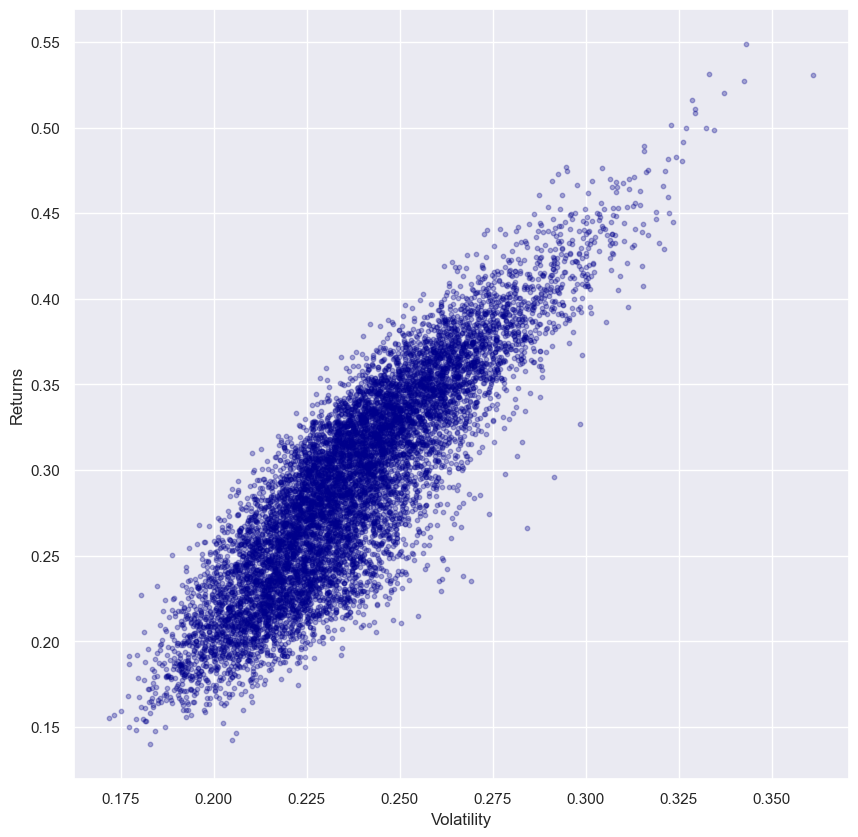

In [27]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10], color='darkblue');

In [28]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.16
Volatility     0.17
MSFT weight    0.04
AAPL weight    0.06
GOOGL weight   0.03
HD weight      0.09
SBUX weight    0.13
TSLA weight    0.01
CVX weight     0.15
ABBV weight    0.21
KO weight      0.27
Name: 3162, dtype: float64

/var/folders/74/7098k_jd3bz6dklwx9078h6r0000gn/T/ipykernel_35468/130397203.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=40);


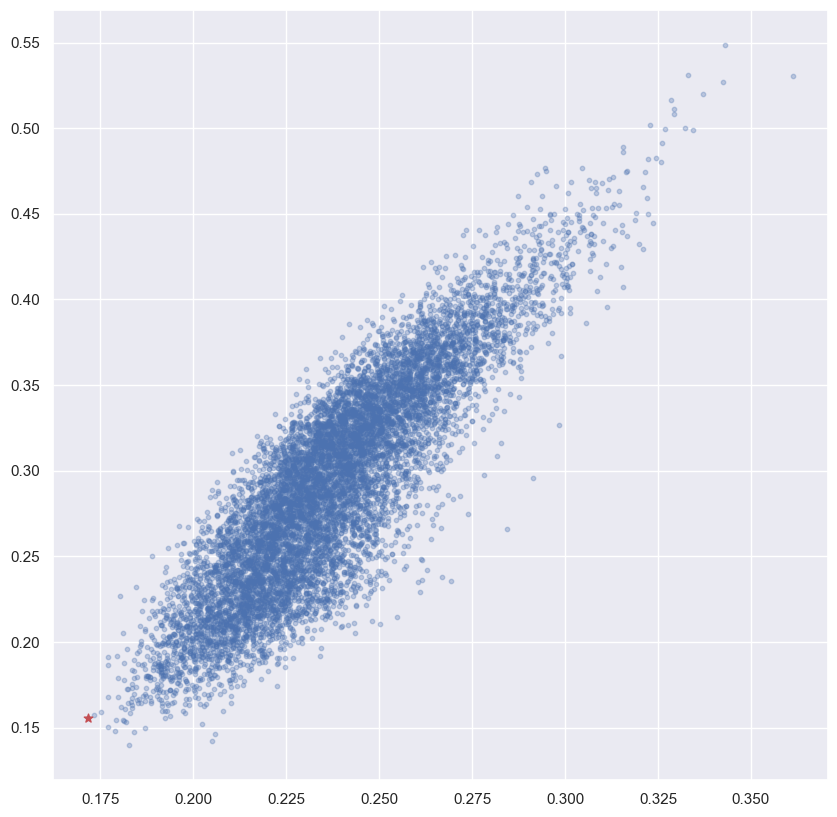

In [29]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=40);

In [30]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.48
Volatility     0.29
MSFT weight    0.04
AAPL weight    0.06
GOOGL weight   0.01
HD weight      0.03
SBUX weight    0.09
TSLA weight    0.34
CVX weight     0.16
ABBV weight    0.23
KO weight      0.02
Name: 8365, dtype: float64

/var/folders/74/7098k_jd3bz6dklwx9078h6r0000gn/T/ipykernel_35468/115080554.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_vol_port[1], min_vol_port[0], color='black', marker='*', s=100)
/var/folders/74/7098k_jd3bz6dklwx9078h6r0000gn/T/ipykernel_35468/115080554.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=100)


Text(0, 0.5, 'Returns')

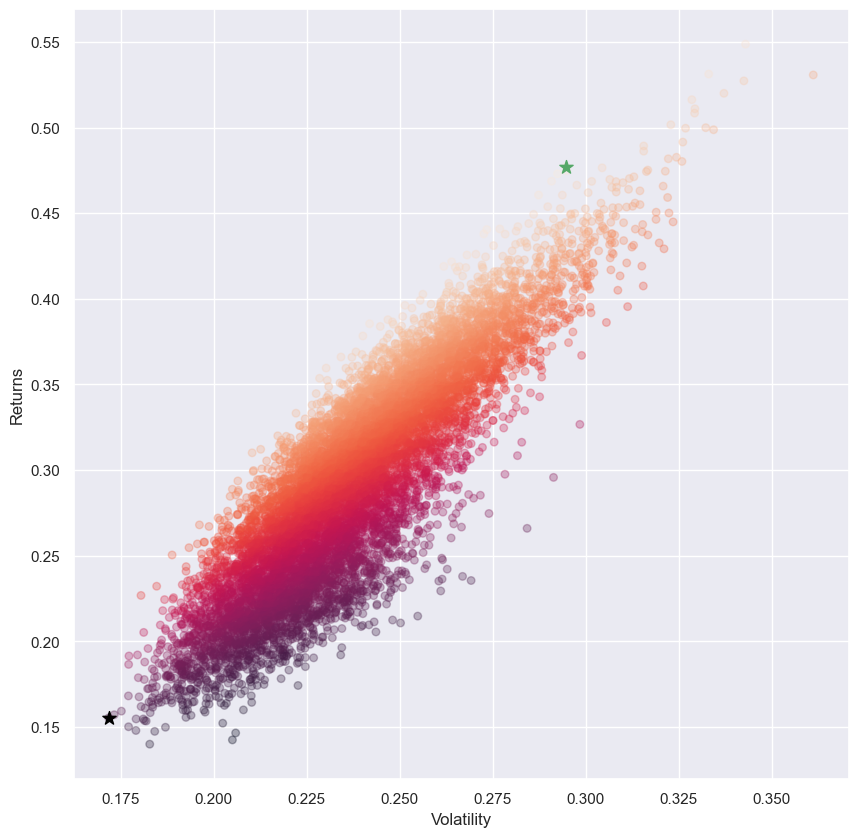

In [31]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
sharpe_err = portfolios['Returns'] / portfolios['Volatility']
plt.scatter(portfolios['Volatility'], portfolios['Returns'], c=sharpe_err, s=30, alpha=0.3,)
plt.scatter(min_vol_port[1], min_vol_port[0], color='black', marker='*', s=100)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=100)
plt.xlabel('Volatility')
plt.ylabel('Returns')

--------------------------

Calculate the CAGR, returns, and covariance
To calculate the expected return, we use the Compound Average Growth Rate (CAGR) based on the last 5 years. The CAGR is used as investopedia suggest. An alternative that also is being used is the mean of the returns. The key thing is to have some common measure of the return.

The CAGR is calculated as follows.

$$CAGR = (end-price/start-price)^(1/years) – 1$$

We will also calculate the covariance as we will use that the calculate the variance of a weighted portfolio. Remember that the standard deviation is given by the following.

sigma = sqrt(variance)

A portfolio is a vector w with the balances of each stock. For example, given `w = [0.2, 0.3, 0.4, 0.1]`, will say that we have 20% in the first stock, 30% in the second, 40% in the third, and 10% in the final stock. It all sums up to 100%.

Given a weight w of the portfolio, you can calculate the variance of the stocks by using the covariance matrix.

$$variance = w^T Cov w$$

Where Cov is the covariance matrix.

In [32]:
returns = df/df.shift(1)
years = 3
cagr = (df.iloc[-1]/df.iloc[0])**(1/years) - 1

returns.dropna(inplace=True)
print(returns.mean())
cov = returns.cov()
print(cagr)


MSFT    1.00
AAPL    1.00
GOOGL   1.00
HD      1.00
SBUX    1.00
TSLA    1.00
CVX     1.00
ABBV    1.00
KO      1.00
dtype: float64
MSFT    1.30
AAPL    1.03
GOOGL   0.95
HD      0.85
SBUX    0.67
TSLA    3.79
CVX     0.10
ABBV    0.64
KO      0.23
dtype: float64


In [33]:
print(cov)

       MSFT  AAPL  GOOGL   HD  SBUX  TSLA  CVX  ABBV   KO
MSFT   0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
AAPL   0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
GOOGL  0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
HD     0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
SBUX   0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
TSLA   0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
CVX    0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
ABBV   0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00
KO     0.00  0.00   0.00 0.00  0.00  0.00 0.00  0.00 0.00


Plot the return and risk
This is where the power of computing comes into the picture. The idea is to just try a random portfolio and see how it rates with regards to expected return and risk.

It is that simple. Make a random weighted distribution of your portfolio and plot the point of expected return (based on our CAGR) and the risk based on the standard deviation calculated by the covariance.

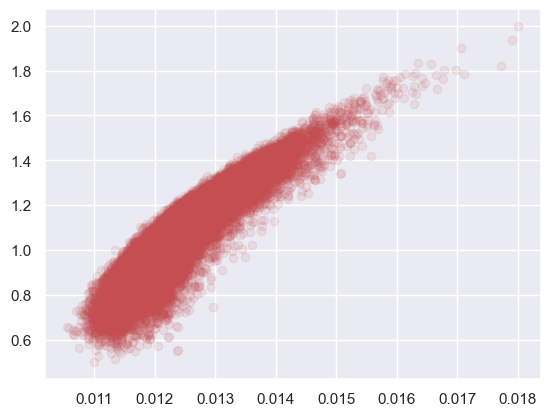

In [34]:
def random_weights(n):
    k = np.random.rand(n)
    return k / sum(k)
exp_return = []
sigma = []
for _ in range(20000):
  w = random_weights(len(df.columns))
  exp_return.append(np.dot(w, cagr.T))
  sigma.append(np.sqrt(np.dot(np.dot(w.T, cov), w)))
plt.plot(sigma, exp_return, 'ro', alpha=0.1) 
# plt.plot(min_vol_port[1], min_vol_port[0], color='black', marker='*')
# plt.plot(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*')
plt.show()